# 데이터 시각화 3일차
## - Seaborn 라이브러리 -

### 전세계 인터넷 사용자 데이터 읽기

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import koreanize_matplotlib

internet_df = pd.read_csv('global_internet_users.csv')
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB
None


In [19]:
countries = ['China', 'India', 'South Korea']
df = internet_df.loc[internet_df['Entity'].isin(countries)]

print(df[df['Entity'] == 'South Korea'].head())

      Unnamed: 0       Entity Code  Year  Cellular Subscription  \
7414        7414  South Korea  KOR  1980               0.000000   
7415        7415  South Korea  KOR  1981               0.000000   
7416        7416  South Korea  KOR  1982               0.000000   
7417        7417  South Korea  KOR  1983               0.000000   
7418        7418  South Korea  KOR  1986               0.017182   

      Internet Users(%)  No. of Internet Users  Broadband Subscription  
7414                0.0                      0                     0.0  
7415                0.0                      0                     0.0  
7416                0.0                      0                     0.0  
7417                0.0                      0                     0.0  
7418                0.0                      0                     0.0  


### 관계형 그래프 : lineplot() 예제 1

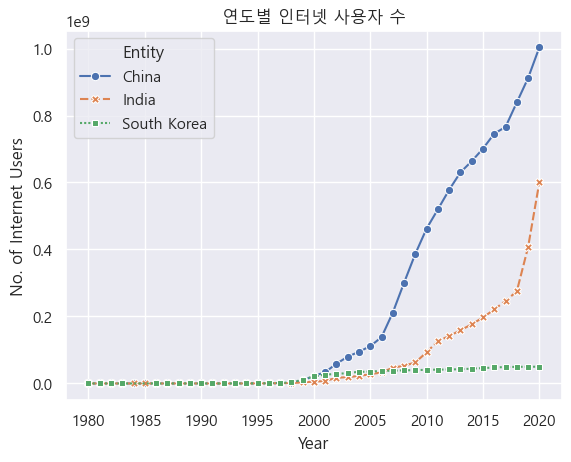

In [20]:
sns.lineplot(data=df, x='Year', y='No. of Internet Users',    # y='No. of Internet Users' => 컬럼명을 문자열로 입력
             hue='Entity', style='Entity', markers=True)
                # ㄴ> 국가별 색상 따로 
plt.title('연도별 인터넷 사용자 수')
plt.show()

### 관계형 그래프 : lineplot() 예제 2

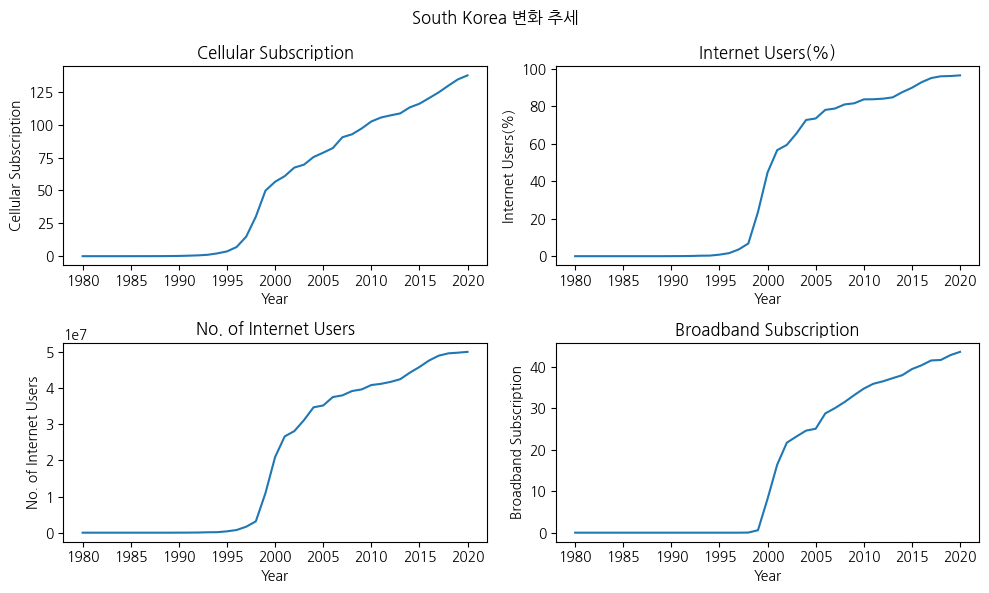

In [8]:
column_list = ['Cellular Subscription', 'Internet Users(%)',
               'No. of Internet Users', 'Broadband Subscription']
country = 'South Korea'
country_df = df[df['Entity'] == country]

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))
# Cellular Subscription
sns.lineplot(data=country_df, x='Year', y=column_list[0], ax=ax1)
ax1.set_title(column_list[0], fontsize=12)

# Internet Users(%)
sns.lineplot(data=country_df, x='Year', y=column_list[1], ax=ax2)
ax2.set_title(column_list[1], fontsize=12)

# No. of Internet Users
sns.lineplot(data=country_df, x='Year', y=column_list[2], ax=ax3)
ax3.set_title(column_list[2], fontsize=12)

# Broadband Subscription
sns.lineplot(data=country_df, x='Year', y=column_list[3], ax=ax4)
ax4.set_title(column_list[3], fontsize=12)

fig.suptitle(f'{country} 변화 추세')
plt.tight_layout()
plt.show()

### 관계형 그래프 lineplot() : 5개국 각 항목별 수치 비교

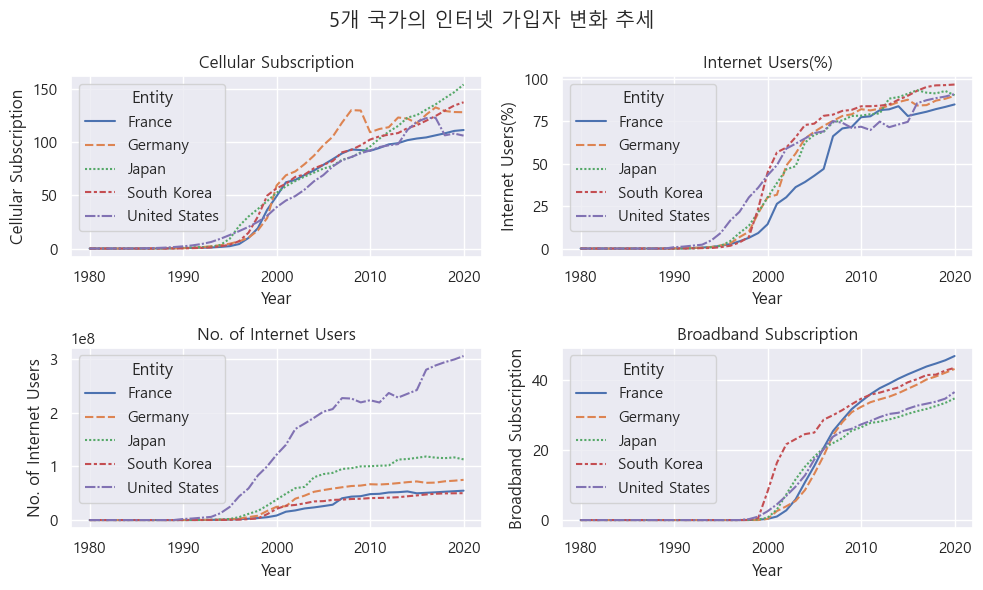

In [27]:
df = pd.read_csv('global_internet_users.csv')

country_entites = ['South Korea', 'United States', 'France', 'Japan', 'Germany']

countries_df = df.loc[df['Entity'].isin(country_entites)]
column_list = ['Cellular Subscription',
               'Internet Users(%)',
               'No. of Internet Users',
               'Broadband Subscription']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))

# Cellular Subscription
sns.lineplot(data=countries_df, x='Year', y=column_list[0],
             hue='Entity', style='Entity', dashes=True, ax=ax1)
            # hue='Entity' : 국가별로 색상 다르게
            # style='Entity' : 국가별로 스타일 다르게
            # dashes=True : 국가별로 다른 점선/실선 패턴 적용, dashes는 style과 같이 쓸 것
ax1.set_title(column_list[0], fontsize=12)

# Internet Users(%)
sns.lineplot(data=countries_df, x='Year', y=column_list[1],
             hue='Entity', style='Entity', dashes=True, ax=ax2)
ax2.set_title(column_list[1], fontsize=12)

# No. of Internet Users
sns.lineplot(data=countries_df, x='Year', y=column_list[2],
             hue='Entity', style='Entity', dashes=True, ax=ax3)
ax3.set_title(column_list[2], fontsize=12)

# Broadband Subscription
sns.lineplot(data=countries_df, x='Year', y=column_list[3],
             hue='Entity', style='Entity', dashes=True, ax=ax4)
ax4.set_title(column_list[3], fontsize=12)

fig.suptitle(f'5개 국가의 인터넷 가입자 변화 추세')
plt.tight_layout()
plt.show()

### Seaborn : tips 데이터셋 불러오기

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import koreanize_matplotlib

# 'tips' 데이터셋 불러오기(seaborn에 내장되어 있는 데이터셋임)
tips=  sns.load_dataset('tips')    # => DataFrame 생성
# sns.load_dataset('데이터셋 이름') : pandas의 dataframe을 반환
# DataFrame.to_csv(‘파일이름.csv’, index=False) : dataframe을 csv파일로 저장

# DataFrame을 CSV 파일로 저장
# index=False로 설정하면 DataFrame의 인덱스가 파일에 저장되지 않음
tips.to_csv('tips.csv', index=False)

print('tips.csv 파일이 성공적으로 저장되었습니다.')

tips.csv 파일이 성공적으로 저장되었습니다.


### Seaborn : tips 데이터 확인

In [11]:
print(tips.info())    # 데이터프레임의 데이터 타입 및 컬럼 자료형 확인
print(tips.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 관계형 그래프 : scatterplot 1

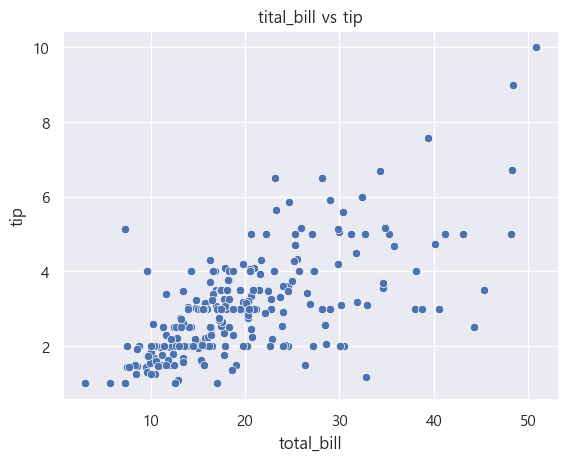

In [33]:
# darkgrid, whitegrid, dark, white, ticks 중 선택
sns.set_theme(style='darkgrid')    # 그냥 옵션임. 안 해도 됨.

plt.rc('font', family='Malgun Gothic')    # Windows 사용자

# 기본 산점도
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.title('tital_bill vs tip')
plt.show()    # 그래프는 양의 상관관계

### 관계형 그래프 : scatterplot 2

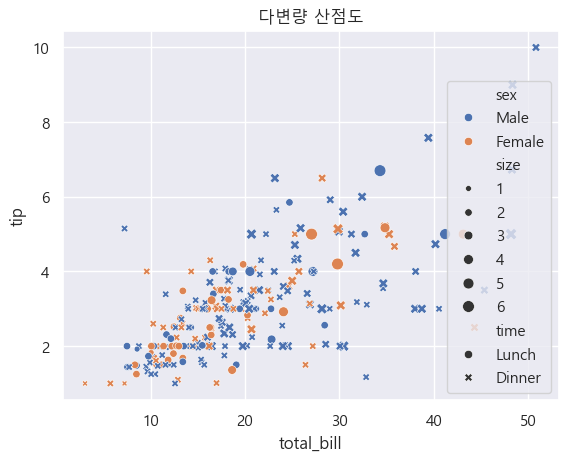

In [13]:
# 색상과 크리고 추가 변수 표현
sns.scatterplot(data=tips, x='total_bill', y='tip',
                hue='sex', size='size', style='time')

plt.title('다변량 산점도')
plt.show()

### 관계형 그래프 : relplot 예제 1

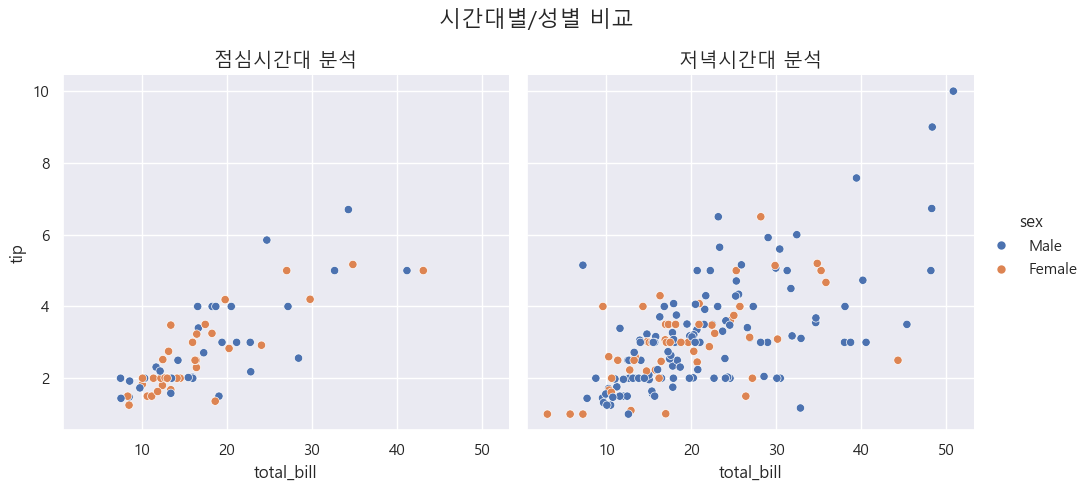

In [41]:
# 시간대별, 성별 비교
g = sns.relplot(data=tips, x='total_bill', y='tip',
               hue='sex', col='time')
# -- 여기서부터 --
g.axes[0,0].set_title('점심시간대 분석', fontsize=14)
g.axes[0,1].set_title('저녁시간대 분석', fontsize=14)

g.figure.suptitle('시간대별/성별 비교', size=16)
# 그래프 상단의 여백을 줄임
g.figure.subplots_adjust(top=0.85)
# --- 여기까지 주석처리해도 자동으로 제목까지 생성해서 출력함 ---
plt.show()

### 관계형 그래프 : relplot 예제 2

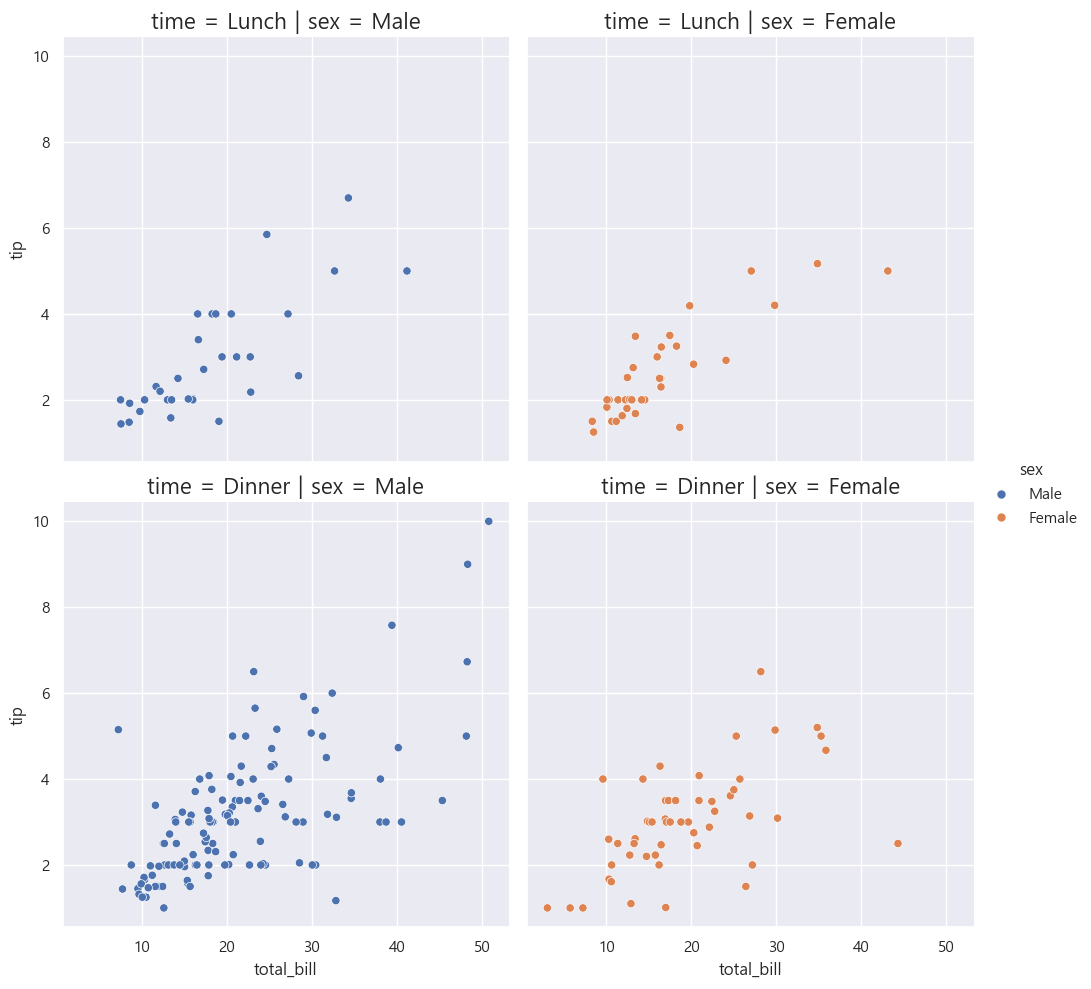

In [44]:
# 성별, 시간대별 4개 패널 비교
g = sns.relplot(data=tips, x='total_bill', y='tip', hue='sex', col='sex', row='time')

g.set_titles(size=16)    # set_titles() : 각 컬럼 타이틀 글자 크기를 한번에 변경
plt.show()

### 관계형 그래프 : relplot 예제 3

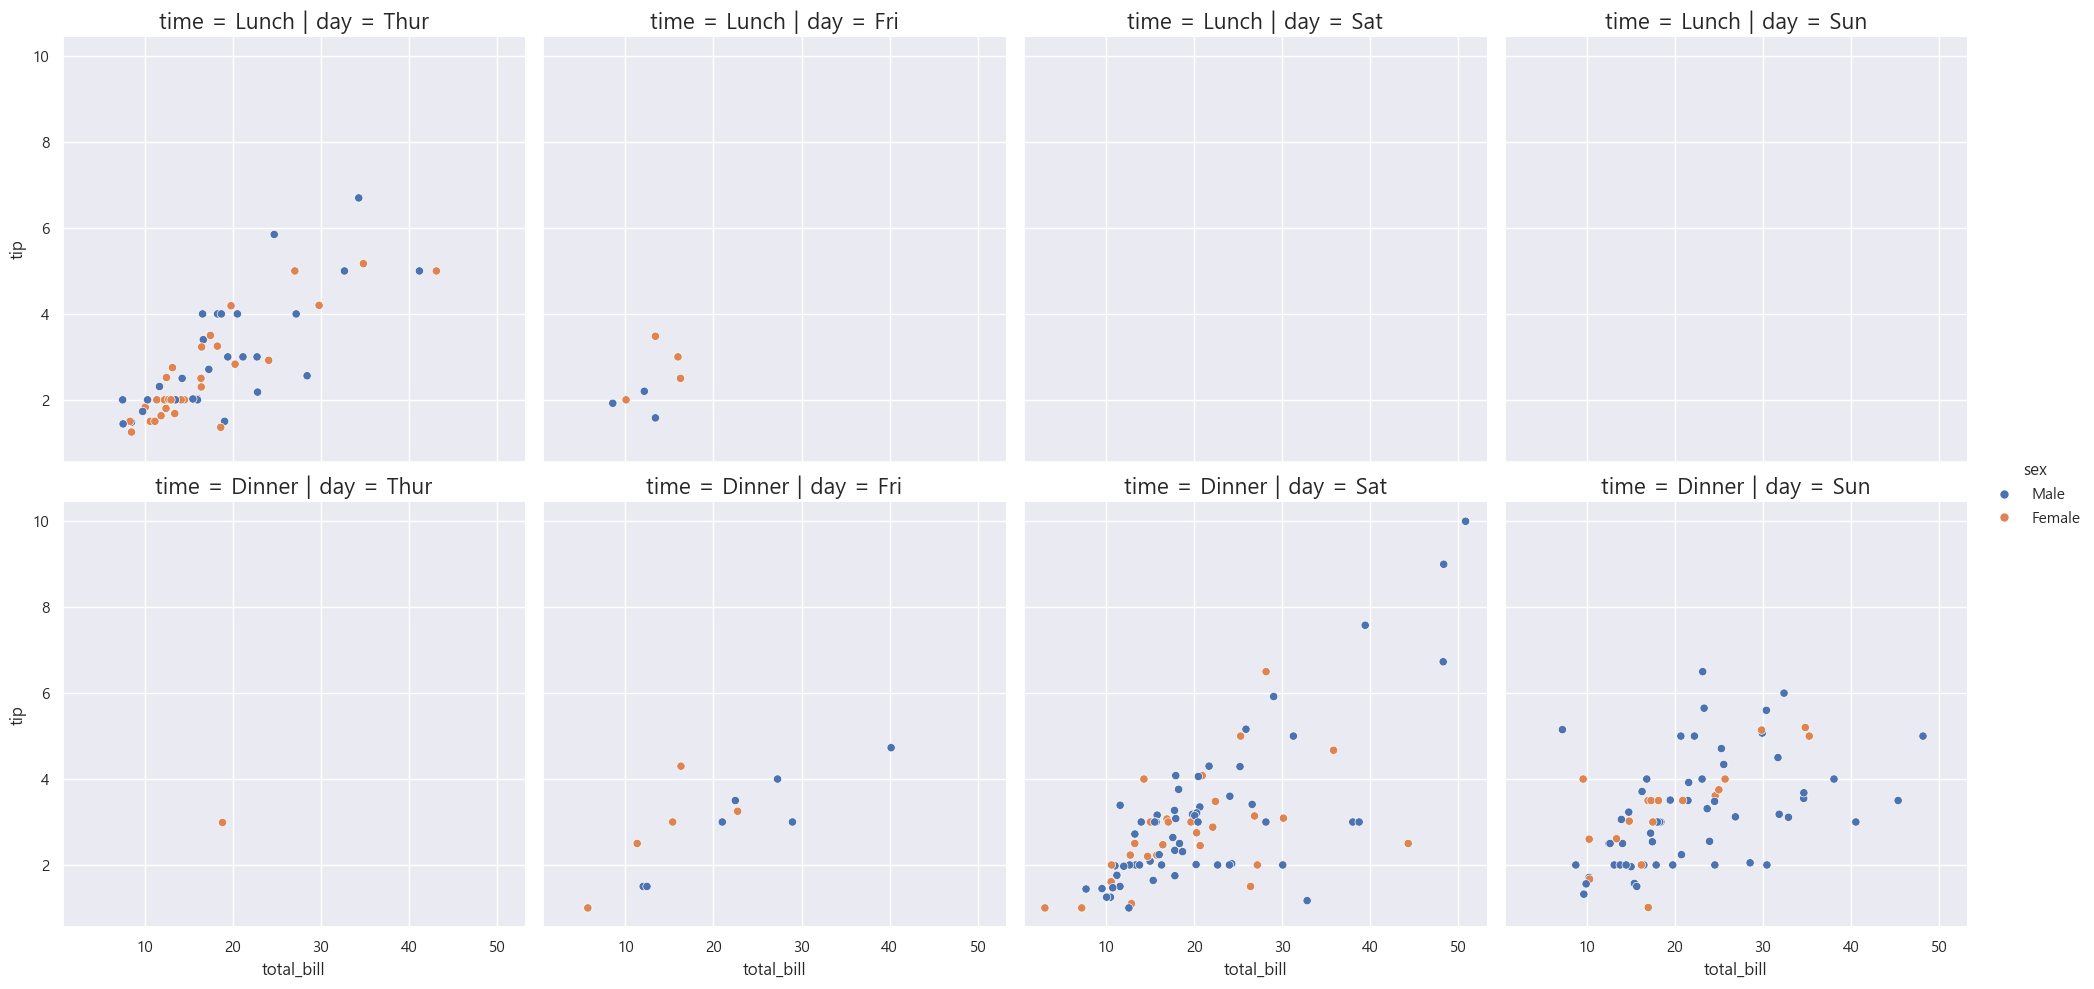

In [46]:
# 요일(Thur, Fri, Sat, Sun)별 시간대별 분류
g = sns.relplot(data=tips, x='total_bill', y='tip', hue='sex', col='day', row='time')
# col='day', row='time' : 'day' 4개분류(목,금,토,일) X 'time' 2개분류(점심/저녁) => 총 8개

g.set_titles(size=16)
plt.show()

### 분포형 그래프 : histplot() 함수 예제 1

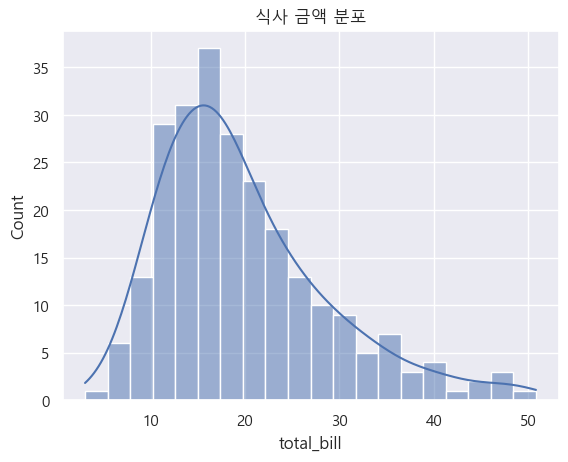

In [47]:
# 기본 히스토그램
sns.histplot(data=tips, x='total_bill', bins=20, kde=True)
# kde=True : 데이터의 분포를 부드러운 곡선 형태로 시각화
#            변수의 확률 분포 특성을 추정하는 것
plt.title('식사 금액 분포')
plt.show()

### 분포형 그래프 : histplot() 함수 예제 2

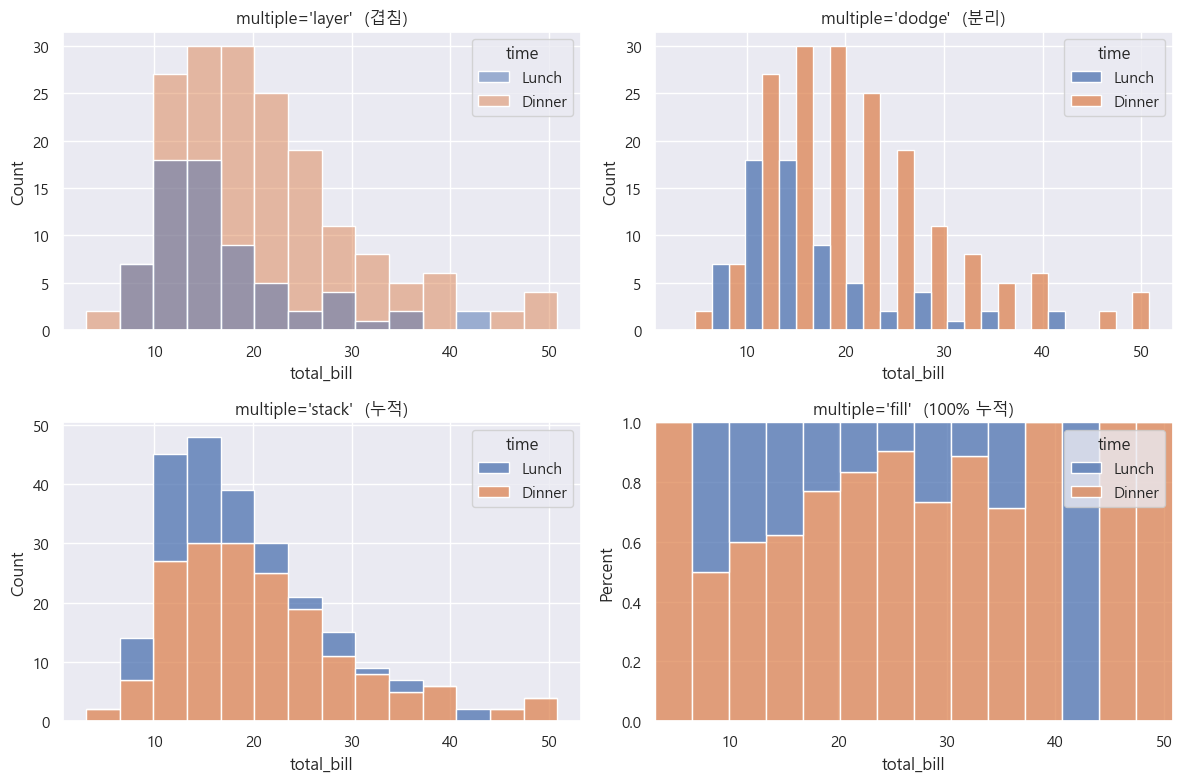

In [23]:
fig, axes = plt.subplots(2,2, figsize=(12,8))

sns.histplot(data=tips, x='total_bill', hue='time',
             multiple='layer', ax=axes[0,0])
axes[0,0].set_title("multiple='layer'  (겹침)")

sns.histplot(data=tips, x='total_bill', hue='time',
             multiple='dodge', ax=axes[0,1])
axes[0,1].set_title("multiple='dodge'  (분리)")

sns.histplot(data=tips, x='total_bill', hue='time',
             multiple='stack', ax=axes[1,0])
axes[1,0].set_title("multiple='stack'  (누적)")

sns.histplot(data=tips, x='total_bill', hue='time',
             multiple='fill', stat='percent', ax=axes[1,1])
axes[1,1].set_title("multiple='fill'  (100% 누적)")

plt.tight_layout()
plt.show()

### 분포형 그래프 : kdeplot() 예제

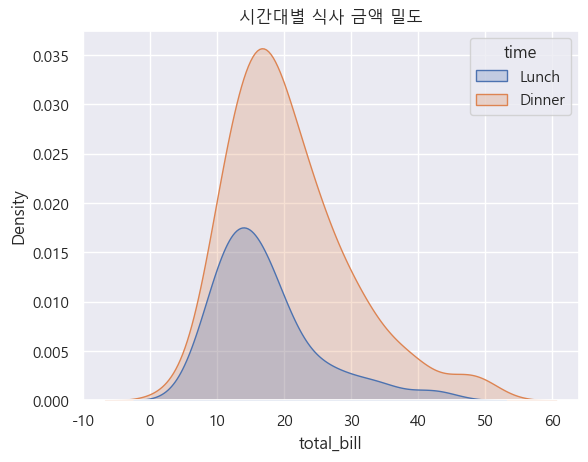

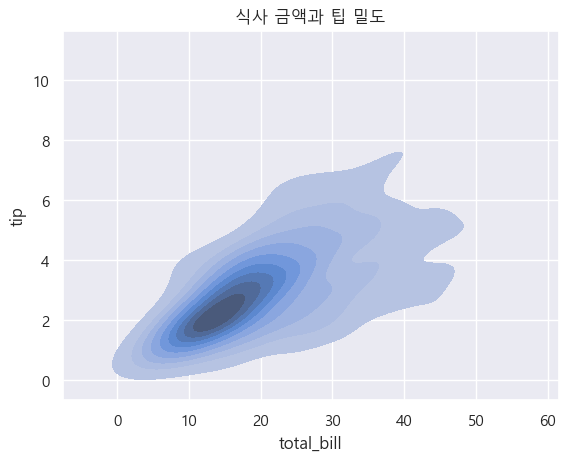

In [ ]:
# 1차원 KDE
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True)    # fill=True : 곡선 내부 채우기
plt.title('시간대별 식사 금액 밀도')
plt.show()

# 2차원 KDE
sns.kdeplot(data=tips, x='total_bill', y='tip', fill=True)
plt.title('식사 금액과 팁 밀도')
plt.show()

### 범주형 그래프 : boxplot() 예제

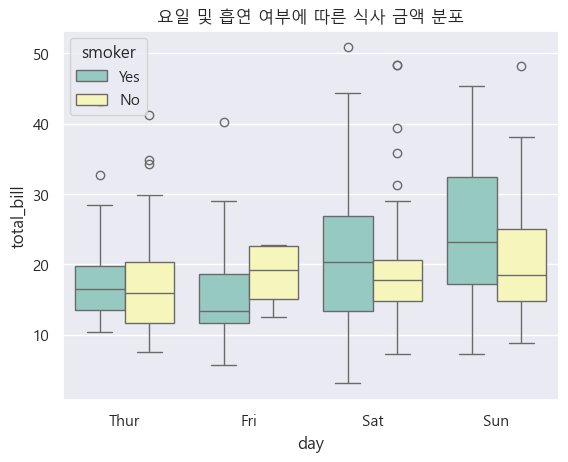

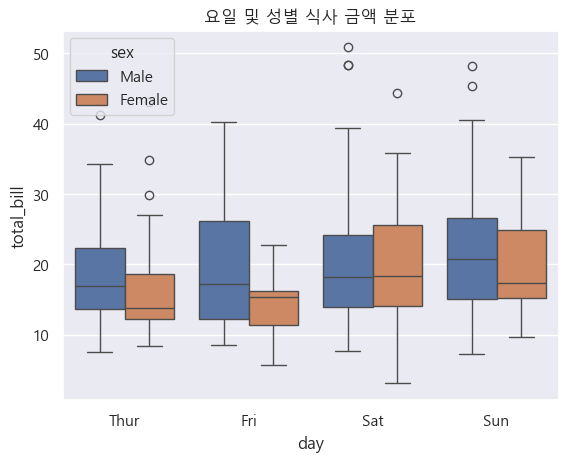

In [56]:
sns.boxplot(data=tips, x='day', y='total_bill',
            hue='smoker', palette='Set3')    # 흡연여부로 분류
plt.title('요일 및 흡연 여부에 따른 식사 금액 분포')
plt.show()

# sns.boxplot(data=tips, x='day', y='total_bill')
sns.boxplot(data=tips, x='day', y='total_bill', hue='sex')    # 성별로 분류
plt.title('요일 및 성별 식사 금액 분포')
plt.show()

### 범주형 그래프 : violinplot() 함수

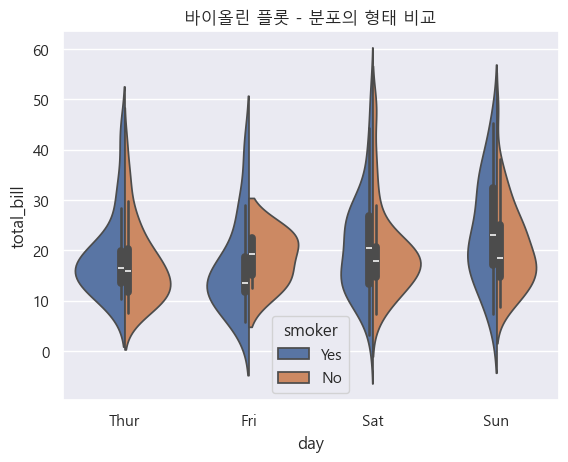

In [59]:
sns.violinplot(data=tips, x='day', y='total_bill',
               hue='smoker', split=True)    # 2개(흡연, 비흡연)
# split=True : 각 바이올린을 두개의 카테고리에 따라 나눌것인지 결정(흡연/비흡연 2개를 절반씩 보여줌)
# hue 매개변수와 같이 사용
plt.title('바이올린 플롯 - 분포의 형태 비교')
plt.show()

### 범주형 그래프 : countplot() 함수

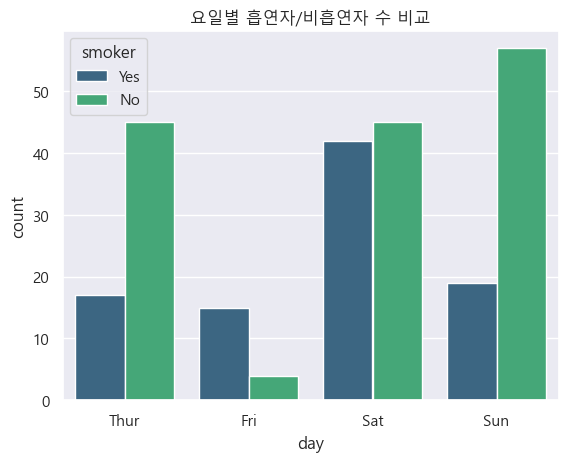

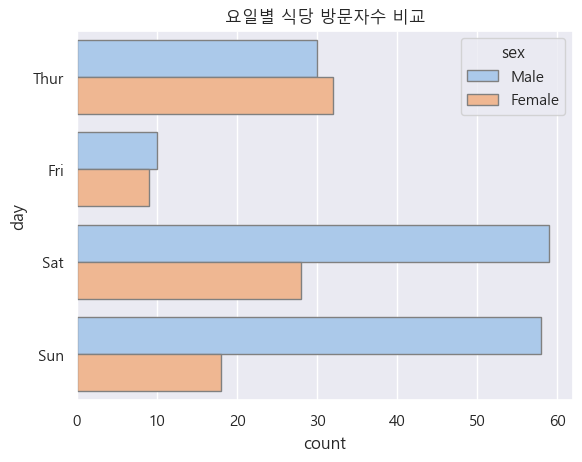

In [30]:
sns.countplot(data=tips, x='day', hue='smoker', palette='viridis')
plt.title('요일별 흡연자/비흡연자 수 비교')
plt.show()

sns.countplot(data=tips, y='day', hue='sex',
              palette='pastel', edgecolor='gray')
plt.title('요일별 식당 방문자수 비교')
plt.show()

### 범주형 그래프 : barplot() 예제

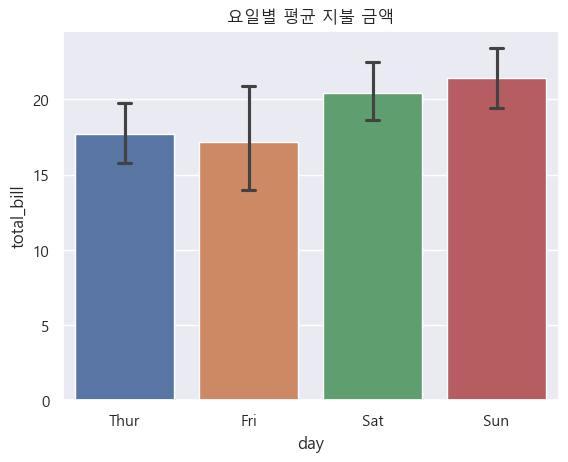

[Thur] 평균=17.68, 최대=43.11
[Fri] 평균=17.15, 최대=40.17
[Sat] 평균=20.44, 최대=50.81
[Sun] 평균=21.41, 최대=48.17


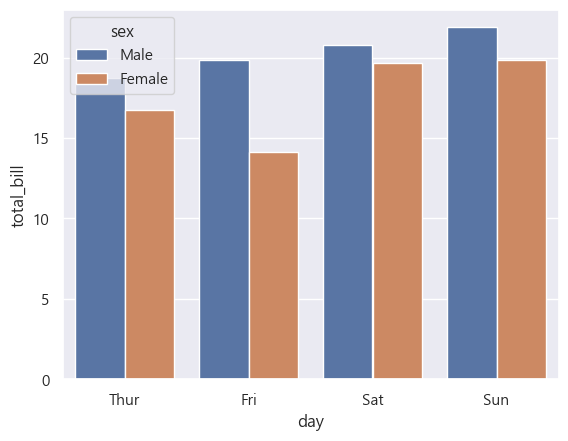

In [ ]:
# 평균값 막대 그래프
sns.barplot(data=tips, x='day',y='total_bill',
            hue='day', capsize=0.1, estimator='mean')
plt.title('요일별 평균 지불 금액')
plt.show()

for day in ['Thur', 'Fri', 'Sat', 'Sun']:    # 목금토일을 리스트로 만듬
    day_total = tips[tips['day'] == day]['total_bill']    # 해당 요일별 total_bill만 가져옴 => 요일별 평균값 계산
    print(f'[{day}] 평균={day_total.mean():.2f}, 최대={day_total.max():.2f}')

sns.barplot(data=tips, x='day', y='total_bill', hue='sex',
            errorbar=None, estimator='mean')
plt.show()

### 회귀형 그래프 : regplot() 예제

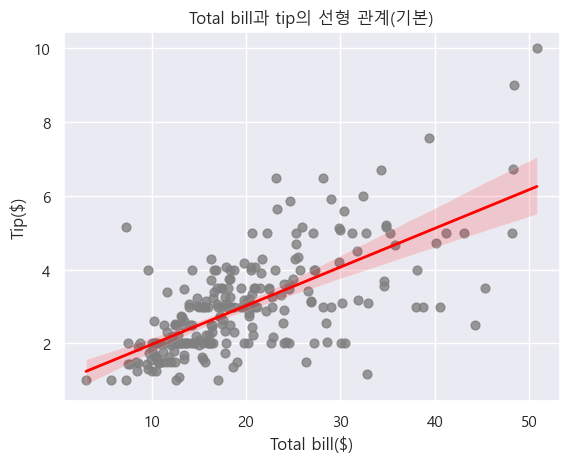

In [62]:
# 기본 regplot : 총 청구액 vs 팁

sns.regplot(data=tips, x='total_bill', y='tip',
            scatter_kws={'color':'gray', 's':40},
            line_kws={'color':'red', 'lw':2})

plt.title('Total bill과 tip의 선형 관계(기본)')
plt.xlabel('Total bill($)')
plt.ylabel('Tip($)')
plt.show()

### 회귀형 그래프 : lmplot() 예제 1

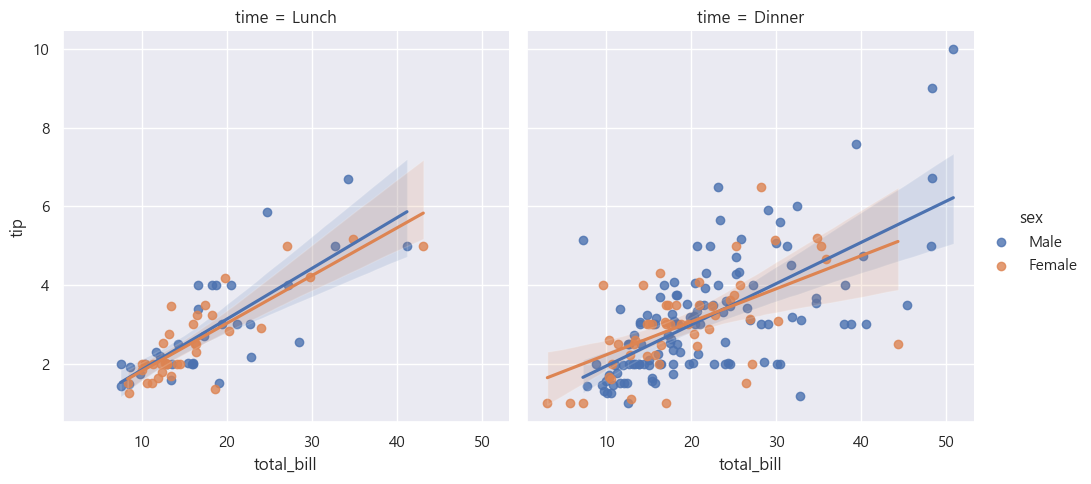

In [65]:
# lmplot() (FacetGrid + regplot) : linear model, 선형모델
# FacetGrid : subplot 자동 생성 용도
# 시간대별 패널 분할(col='time')
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', col='time')
plt.show()

### 회귀형 그래프 : lmplot() 예제 2

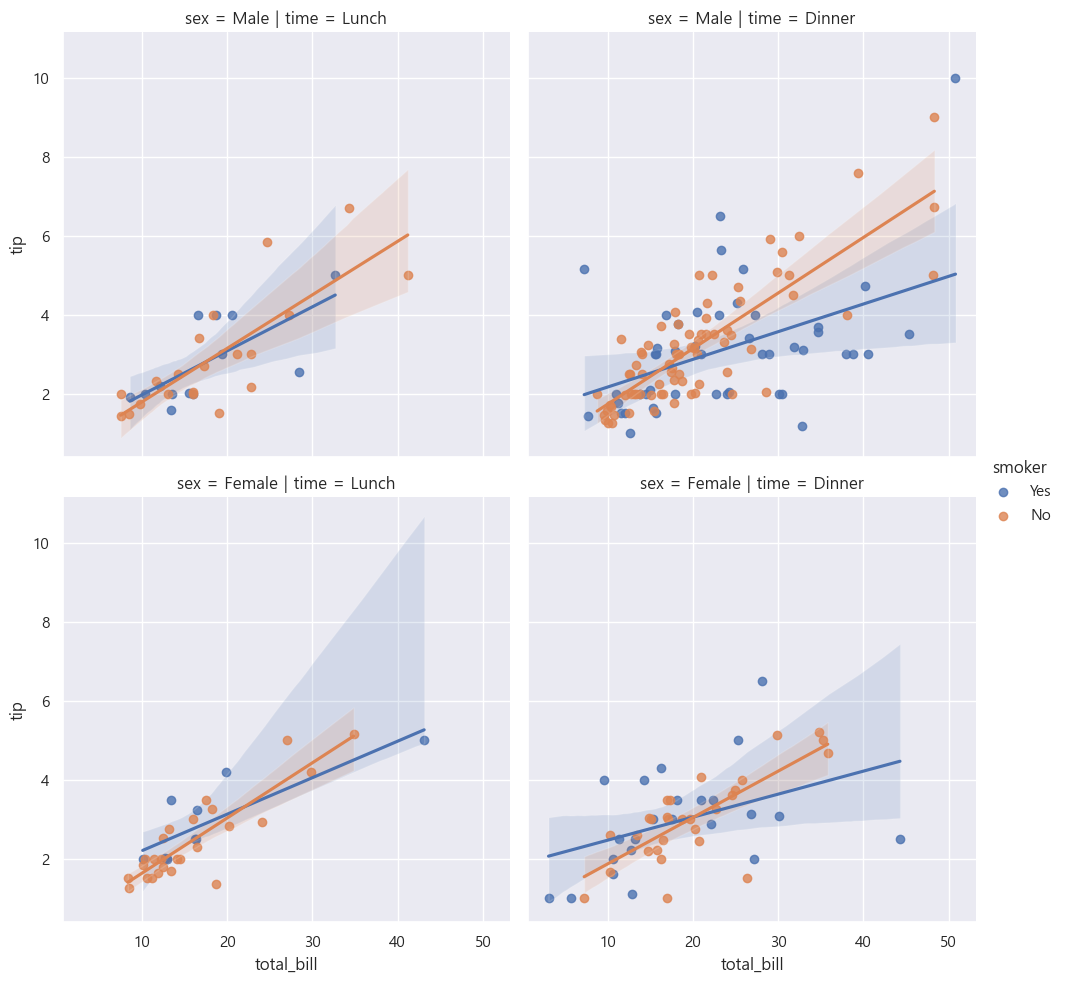

In [66]:
# 시간대별, 흡연 여부에 따른 패널 분할(col)
sns.lmplot(data=tips, x='total_bill', y='tip',
           hue='smoker', col='time', row='sex')
plt.show()

### 매트릭스형 그래프 : heatmap() 예제

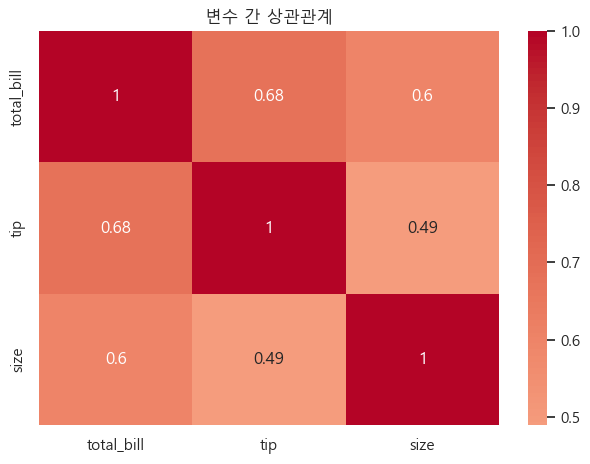

In [67]:
# 상관관계 히트맵 : DataFrame.corr() 함수 사용
corr = tips.select_dtypes(include='number').corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('변수 간 상관관계')
plt.tight_layout()
plt.show()

### Multi-plot grids 유형 : jointplot 예제

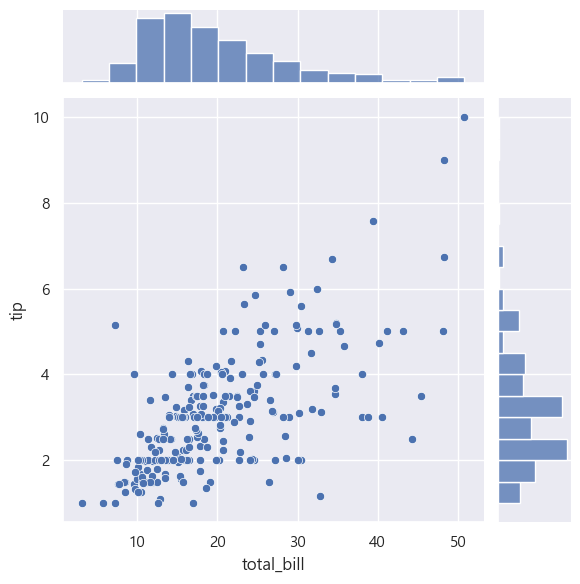

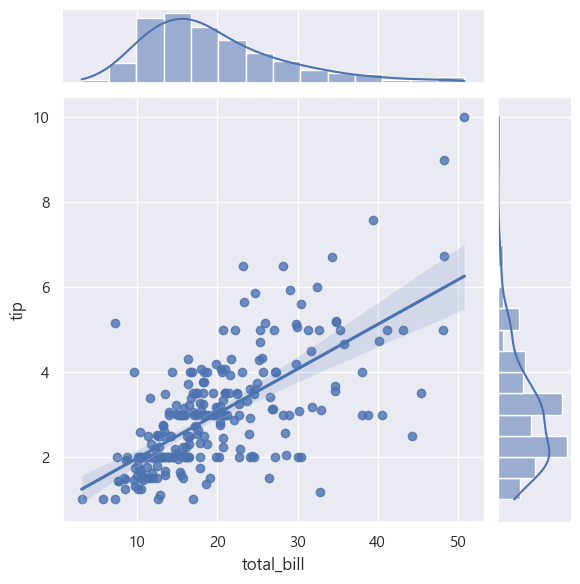

In [68]:
# 산점도 + 히스토그램
sns.jointplot(data=tips, x='total_bill', y='tip', kind='scatter')
# sns.joinplot(data=tips, x='total_bill', y='tip') 위와 동일
plt.show()

# 회귀선 포함
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg')
plt.show()

### Multi-plot grids 유형 : FacetGrid 예제 1

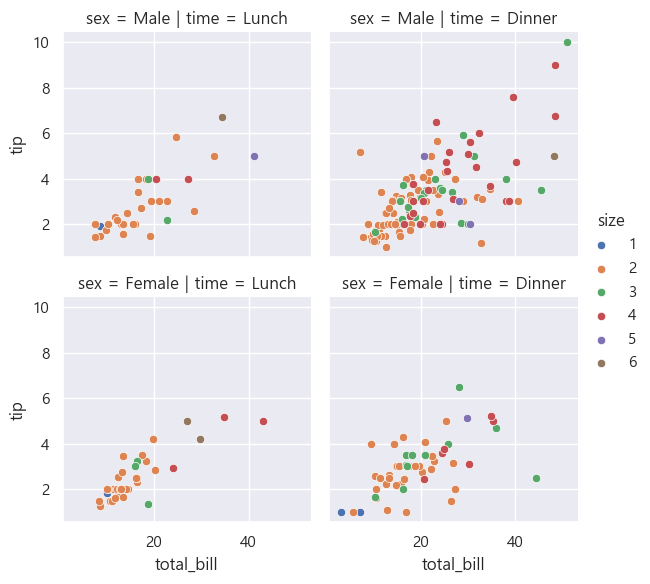

In [70]:
# 조건별 다중 그래프
g = sns.FacetGrid(tips, col='time', row='sex', hue='size')    # 빈 서브플롯
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

### Multi-plot grids 유형 : FacetGrid 예제 2

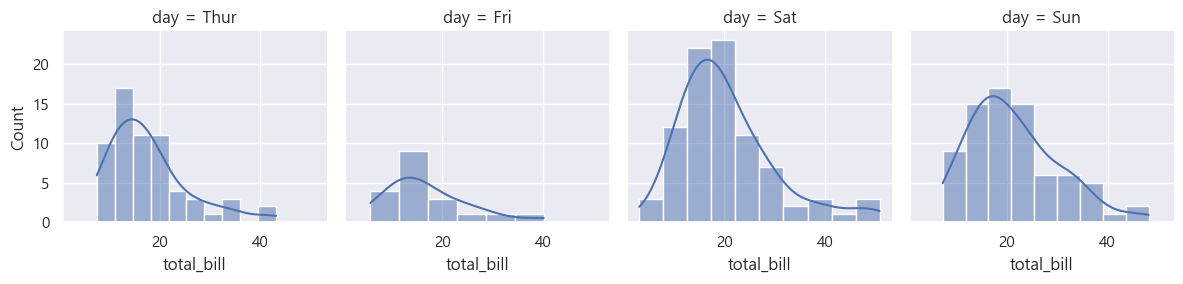

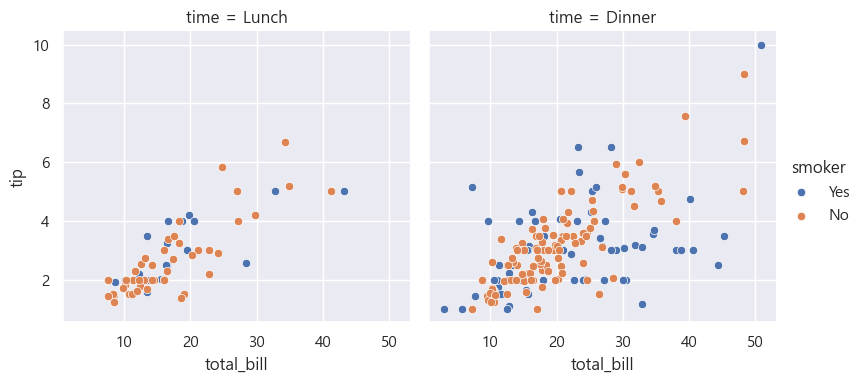

In [71]:
# 히스토그램
g = sns.FacetGrid(tips, col='day', col_wrap=4, height=3)    # col이 4개라서 4개의 빈 subplot 생성됨, height : 그래프 크기(높이)
g.map(sns.histplot, 'total_bill', kde=True)    # 빈 subplot들을 histoplot으로 채움
plt.show()

# FaceGrid 생성 : 열 방향으로 시간(time) 기준, 색상은 흡연 여부(smoker)
g = sns.FacetGrid(tips, col='time', hue='smoker', height=4, col_wrap=2)

# 각 서브플롯에 산점도 그리기(total_bill vs tip)
g.map(sns.scatterplot, 'total_bill', 'tip')
g.add_legend()
plt.show()

### Multi-plot grids 유형 : pairplot() 예제

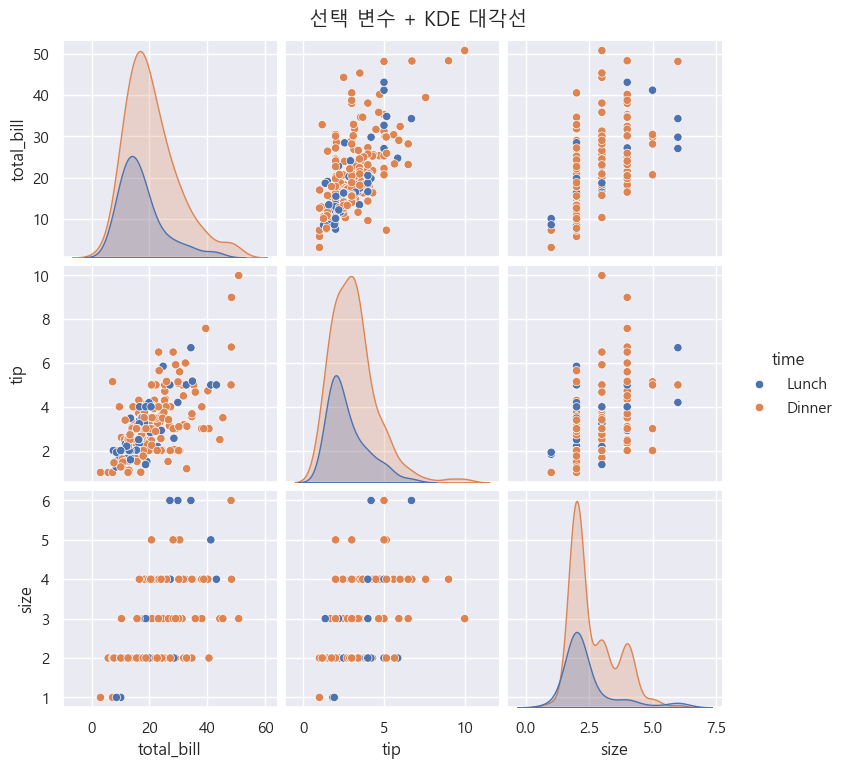

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터로드(수치형 변수 : total_bill, tip, size)
tips = sns.load_dataset('tips')

# pairplot (수치형 변수만 자동 선택)
sns.pairplot(tips, vars=['total_bill', 'tip', 'size'],
             hue='time', diag_kind='kde')

plt.suptitle('선택 변수 + KDE 대각선', y=1.02)
plt.show()

### 범례 위치 조절 : CO2_emission 데이터셋 사용

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv('CO2_emissions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

### 범례 위치 조절

[]

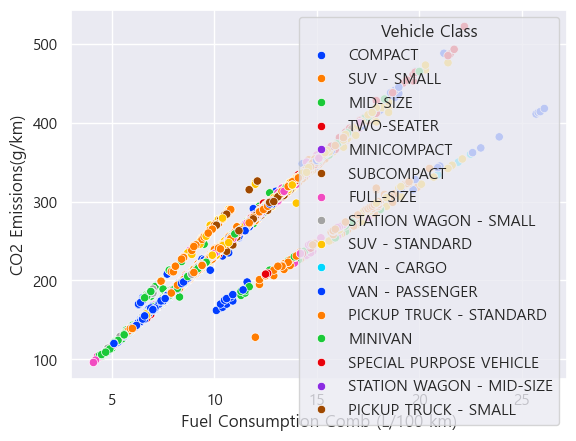

In [73]:
fig, ax = plt.subplots()

sns.scatterplot(x='Fuel Consumption Comb (L/100 km)',
                y='CO2 Emissions(g/km)',
                data=df, hue='Vehicle Class',
                palette='bright', ax=ax)
plt.plot()

### 범례 위치 조절 : bbox_to_anchor(x,y,width,height)

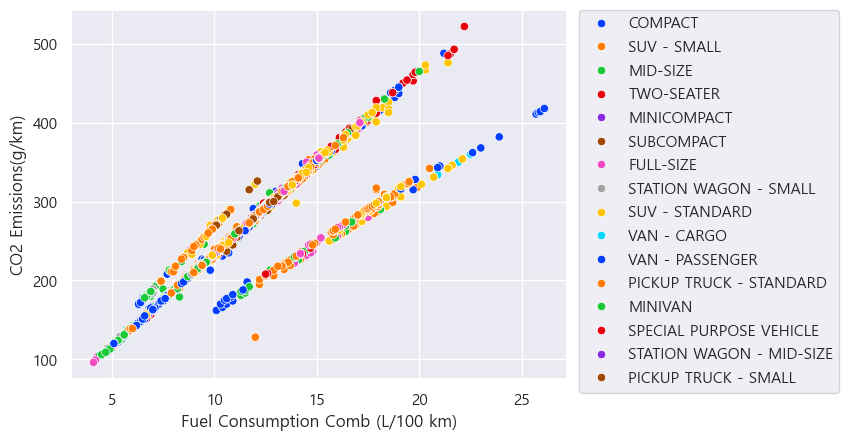

In [75]:
fig, ax = plt.subplots()

sns.scatterplot(x='Fuel Consumption Comb (L/100 km)',
                y='CO2 Emissions(g/km)',
                data=df, hue='Vehicle Class',
                palette='bright', ax=ax)

ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1.02))
plt.show()